In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# import functions from the modsim.py module
from modsim import *

In [2]:
PPsystem = System(alpha=0.05, delta=0.1, beta=0.1, gamma=0.1, t0=0, t_end=500)

In [3]:
PPstate = State(W=1,E=1)

In [4]:
def update_func(state,t,system):
    unpack(system)
    w, e = state
    
    e += alpha*e - beta*e*w
    if e < 0:
        e = 0
    w += delta*e*w - gamma*w
    if w < 0:
        w = 0
    
    return State(W=w, E=e)

In [5]:
def run_simulation(system, update_func, state):
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t0] = state
    
    for t in linrange(t0,t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
        
    return frame

In [8]:
frameData = run_simulation(PPsystem, update_func, PPstate)

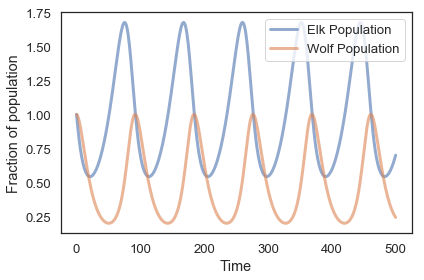

In [9]:
plot(frameData.E, label='Elk Population')
plot(frameData.W, label='Wolf Population')

decorate(xlabel='Time',
             ylabel='Fraction of population')